# Random Forest

* Es un modelo de aprendizaje conjunto basado en múltiples árboles de decisión.
* Puede manejar tanto tareas de clasificación como de regresión y es robusto frente al sobreajuste, lo que lo hace adecuado para predecir diversas variables meteorológicas.

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

# Cargar el conjunto de datos WeatherAUS
data = pd.read_csv('../dataset/weatherAUS.csv')

# 1- creamos el grupo con las ciudades costeras (exploración de la evaluación 02)
grupo01 = data[data['Location'].isin(['Adelaide', 'Cairns', 'Brisbane', 'Gold Coast', 'Hobart', 'Darwin', 'Perth', 'Townsville', 'Sydney', 'Fremantle', 'Wollongong'])]

grupo01_1 = grupo01.copy()
grupo01_1['Date']  = pd.to_datetime(data['Date'])
grupo01_1['Year'] = grupo01_1['Date'].dt.year
grupo01_1['Month'] = grupo01_1['Date'].dt.month
grupo01_1['Day'] = grupo01_1['Date'].dt.day
grupo01_1['WeekDay'] = grupo01_1['Date'].dt.weekday

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
grupo01_1['Location'] = le.fit_transform(grupo01_1['Location'])


conjunto_de_datos_para_primer_modelo = grupo01_1[['MaxTemp','MinTemp','Month','Day','WindSpeed3pm','WindSpeed9am', 'Location']]

conjunto_de_datos_para_primer_modelo = conjunto_de_datos_para_primer_modelo.dropna()

X = conjunto_de_datos_para_primer_modelo.drop(['Location'], axis=1)
y = conjunto_de_datos_para_primer_modelo['Location']

from sklearn.preprocessing import StandardScaler
stscaler= StandardScaler()
# standardization
X_scale = stscaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)





In [56]:
rfc = RandomForestClassifier(random_state=0, criterion='entropy')

# entrenar el modelo
rfc.fit(X_train, y_train)

# predecir el conjunto de x test
y_pred = rfc.predict(X_test)


# revisar la precisión del modelo
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.6130


## Interpretación

### Reporte de Clasificación (Classification Report)

El classification report nos entrega una visión completa del rendimiento del modelo de clasificación multiclase, esto nos permite identificar áreas de mejora y tomar 
medidas adecuadas para optimizar el rendimiento del modelo.

In [57]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.42      0.46      1012
           1       0.69      0.77      0.73      1065
           2       0.58      0.62      0.60       986
           3       0.77      0.83      0.80      1022
           4       0.76      0.76      0.76      1054
           5       0.54      0.53      0.53      1054
           6       0.50      0.50      0.50      1084
           7       0.61      0.57      0.59      1016
           8       0.50      0.51      0.50       960

    accuracy                           0.61      9253
   macro avg       0.61      0.61      0.61      9253
weighted avg       0.61      0.61      0.61      9253



#### Precision
La precisión (precision) indica la proporción de predicciones positivas que fueron correctas. En este contexto multiclase, se calcula para cada clase por separado.

* Para la clase 0, la precisión es 0.60. Esto significa que del total de predicciones que el modelo hizo como clase 0, el 60% fueron realmente correctas.
* Para la clase 1, la precisión es 0.80, indicando que el 80% de las predicciones hechas como clase 1 fueron correctas.
* Este patrón se repite para cada clase de 0 a 8.

#### Recall
El recall (recall) es la proporción de instancias positivas que fueron correctamente detectadas por el modelo. También se calcula para cada clase por separado.

* Para la clase 0, el recall es 0.49. Esto significa que el modelo identificó correctamente el 49% de todas las instancias que pertenecían realmente a la clase 0.
* Para la clase 1, el recall es 0.82, lo que indica que el modelo detectó correctamente el 82% de todas las instancias que eran realmente clase 1.
* Similarmente, se calcula para cada clase de 0 a 8.

#### F1-score
El F1-score (F1-score) es la media armónica de precision y recall. Proporciona un balance entre precision y recall y es útil cuando las clases están desequilibradas.

* Para la clase 0, el F1-score es 0.54. Un valor bajo puede indicar que hay un desbalance entre precision y recall para esta clase.
* Para la clase 1, el F1-score es 0.81, lo que indica un buen balance entre precision y recall para esta clase.
* Se calcula para cada clase de 0 a 8.

#### Support
El support indica el número de muestras reales en cada clase en el conjunto de datos de prueba.

Por ejemplo, hay 1029 muestras para la clase 0, 1036 muestras para la clase 1, y así sucesivamente hasta la clase 8.

#### Interpretación General
El modelo parece tener un buen desempeño general con F1-scores que oscilan principalmente entre 0.54 y 0.85, lo cual indica una capacidad razonable de hacer predicciones precisas y detectar correctamente las instancias de cada clase.

Sin embargo, la clase 0 muestra una precisión y recall relativamente bajos en comparación con otras clases, lo que podría indicar que el modelo tiene dificultades para distinguir esta clase de otras.

Las clases 3 y 4 muestran F1-scores altos, lo que sugiere que el modelo es efectivo para predecir estas clases en particular.

### Sugerencias de mejora

* Para mejorar el modelo, vamos a considerar estrategias como ajustar los hiperparámetros , realizar ingeniería de características adicionales, también podriamos probar con diferentes algoritmos de clasificación para ver si alguno ofrece un rendimiento mejorado en las clases con puntajes F1 más bajos.

* También es útil visualizar la matriz de confusión para obtener una comprensión más detallada de cómo el modelo está clasificando las muestras en diferentes clases

### Matriz de Confusión

Esta herramienta es fundamental para evaluar el rendimiento de un modelo de clasificación multiclase. Cada fila de la matriz representa las instancias en una clase real, mientras que cada columna representa las instancias en una clase predicha por el modelo

* Uso de la Confusion Matrix: La matriz de confusión te proporciona información detallada sobre el rendimiento del modelo en términos de:

|||
|--|--|
|Verdaderos Positivos (TP):| Predicciones correctas para cada clase.|
|Falsos Positivos (FP):| Instancias que el modelo predijo incorrectamente como pertenecientes a esa clase.|
|Verdaderos Negativos (TN):| Instancias que el modelo predijo correctamente como no pertenecientes a esa clase.|
|Falsos Negativos (FN):| Instancias que el modelo predijo incorrectamente como no pertenecientes a esa clase.|



In [58]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[425  59  11  12 132 176  91   9  97]
 [ 20 818  37  17   0  82  48  16  27]
 [  6  49 613  94   0   4   8 211   1]
 [  0  11  83 846   0   3   1  77   1]
 [ 88   3   0   0 801  46  56   5  55]
 [154  90   6   6  35 561 118   9  75]
 [ 49  70  20  15  44  88 542  28 228]
 [  6  27 272 102   0   9  16 577   7]
 [ 80  52  11   1  41  76 198  12 489]]


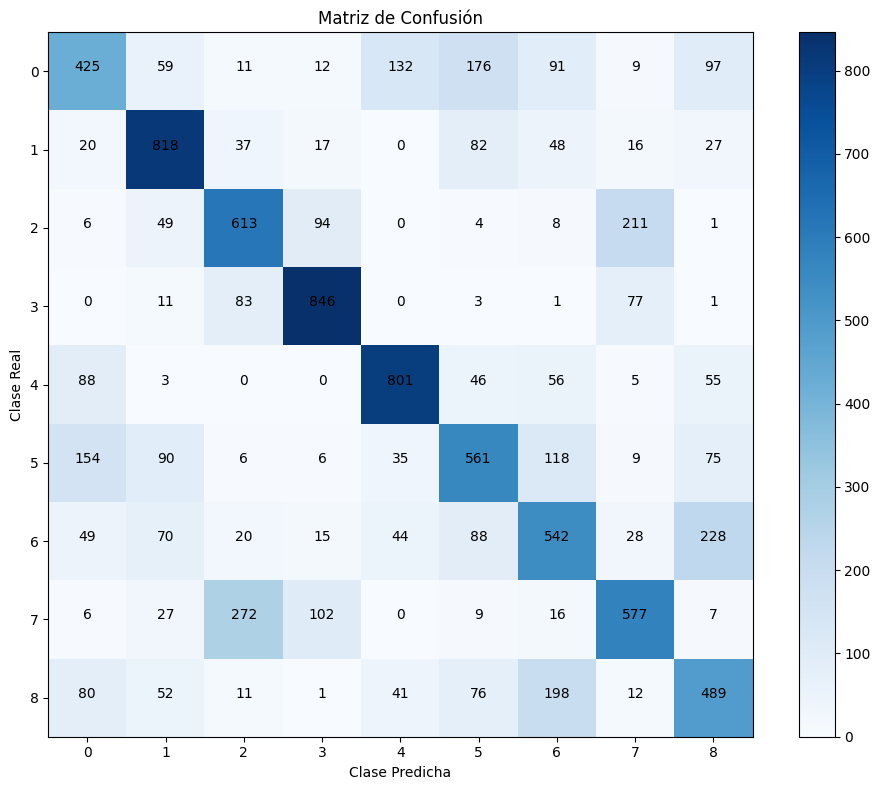

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo de matriz de confusión (sustituye con tus datos reales)
conf_matrix = confusion_matrix(y_test, y_pred)

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Matriz de Confusión')
    plt.colorbar()

    # Etiquetas de los ejes
    tick_marks = np.arange(len(conf_matrix))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)

    # Añadir valores en los cuadros
    for i in range(len(conf_matrix)):
        for j in range(len(conf_matrix)):
            plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="black")

    plt.ylabel('Clase Real')
    plt.xlabel('Clase Predicha')
    plt.tight_layout()
    plt.show()

# Llamar a la función para visualizar la matriz de confusión
plot_confusion_matrix(conf_matrix)

#### Interpretación de la Confusion Matrix

La matriz de confusión tiene 9 clases (porque hay 9 filas y 9 columnas), lo cual indica que estamos analizando un problema de clasificación multiclase con 9 clases diferentes.

|||
|--|--|
|Filas:| Representan las clases reales.|
|Columnas:| Representan las clases predichas por el modelo.|


#### Interpretación Detallada:

Tomaremos la primera fila y la primera columna. Esto se repite para cada fila y columna de la matriz.

* Fila 0 (Clase real 0):
    * El modelo predijo 502 instancias como pertenecientes a la clase 0 (predicciones correctas para la clase 0).
    * De las instancias que realmente pertenecían a la clase 0, el modelo predijo incorrectamente 36 como clase 1, 10 como clase 2, 13 como clase 3, 116 como clase 4, 221 como clase 5, 38 como clase 6, 2 como clase 7, y 91 como clase 8.


In [60]:

# Características más importantes
feature_importances = rfc.feature_importances_
print("\nImportancia de las características:")
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')


Importancia de las características:
MaxTemp: 0.2742
MinTemp: 0.2443
Month: 0.1434
Day: 0.0925
WindSpeed3pm: 0.1289
WindSpeed9am: 0.1167


## Guardar el modelo

In [62]:
# Guardar el modelo entrenado en un archivo .pkl

joblib.dump(rfc, '../app/random_forest_model.pkl')


['../app/random_forest_model.pkl']

## Predicciones manuales

In [67]:
new_data = pd.DataFrame({'MaxTemp': [22.4], 'MinTemp': [10.5],'Month':[2],'Day':[1],'WindSpeed3pm':[30.0],'WindSpeed9am':[37.0]})  
predictions = rfc.predict(new_data)
print(predictions)


[4]


## Predicciones con APP

In [75]:
# Cargar el modelo guardado
loaded_model = joblib.load('../app/random_forest_model.pkl')

# Hacer predicciones con nuevos datos
new_data = pd.DataFrame({'MaxTemp': [22.4], 'MinTemp': [6.5],'Month':[8],'Day':[10],'WindSpeed3pm':[18.0],'WindSpeed9am':[18.0]})
predictions = loaded_model.predict(new_data)

print(predictions)

[6]


## Validando las Predicciones

In [ ]:

conjunto_de_datos_para_primer_modelo.query("Location == 6 and  MaxTemp == 22.4 and WindSpeed3pm >18 ")

In [78]:
conjunto_de_datos_para_primer_modelo.query("MaxTemp == 22.4 and WindSpeed3pm > 18 and Day == 10 ")

,MaxTemp,MinTemp,Month,Day,WindSpeed3pm,WindSpeed9am,Location
32026,22.4,14.7,4,10,20.0,13.0,6
42499,22.4,16.9,3,10,20.0,9.0,8
43350,22.4,14.2,9,10,30.0,6.0,8
